#We're in the Endgame Now - Machine Learning Project 2
By Atticus Nafziger

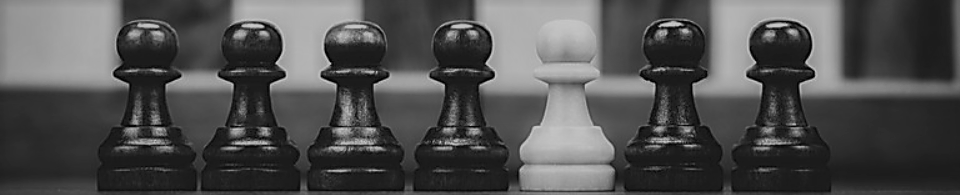

#Introduction

  I remember my first introduction to chess. It was a large children’s book, Checkmate in Chess City. Each page had a different chess situation that would teach how each piece moved. I remember being enthralled by the funny pictures of pawns with faces and the horseys fighting against the enemy spiders to rescue the other pieces. Checkmate in Chess City was the catalyst for my love of chess, and I have been improving my chess abilities ever since. 

  After reading Checkmate in Chess City at age seven, I forced my dad to teach me how a real game of chess was played. Loss after loss, I slowly improved. Even though I kept losing, I stayed resolved on winning a game. We had a magnetic chess set and I brought it everywhere: road trips, restaurants, and airports. Soon, my hard work was worth it. 

  I finally beat my dad in a game: my first victim. Soon after, I beat my brother, then the rest of my siblings. I expanded my range of opponents until nobody wanted to play with me anymore. Due to my dearth of opponents, I stopped playing until I found all the opponents I could ever need. 

  It was not until 2020 that I discovered online chess. A site simply named Chess.com reignited my love of chess. I started playing every day, sometimes up to twenty games a day, and every day I improved. I was happy to be playing again; I started to learn chess theory and memorize openings. I started watching professional chess games and reading books by grandmasters. 

  My chess skills have been beneficial in different ways. First, I have not lost an over-the-board game in a few years. Beating my friends and online opponents always gives me joy and an ego boost. Secondly, playing chess makes me feel good about myself. Chess is an elegant game; when someone is playing chess I immediately assume they are smart, and when I play chess I feel smart. It is also nice to know that on Chess.com, I am in the top 96% of players. Finally, I just enjoy playing chess. While it can be stressful at times, it is overall a good mental reset between schoolwork assignments and the other issues of life. 

  Chess is a complex game; after only five moves from each player, there are sixty-nine trillion possible positions. Grandmasters devote their entire lives to mastering the eight-by-eight checkered board. Playing chess is a skill of mine that I plan on continuing to improve. While I will never achieve the skill level of grandmasters like Magnus Carlson or Garry Kasparov, I can still improve my game and expand my mind. 

  Chess has been prominent throughout my entire life, and it makes sense to combine my love of chess and machine by working on a machine-learning algorithm to predict the winners of chess endgames, one of my favorite parts of chess games. I will be predicting whether white will tie, win less than eight moves, or win in eight moves or more in different endgame positions with white having one rook and a king and black having no pieces besides a king. 





#Exploratory Data 

In [75]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

path = '/content/drive/MyDrive/mlData/'
file = path + 'chess.csv'

chess = pd.read_csv(file)
chess.head()

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [76]:

chess.isnull().any()

WKingF     False
WKingR     False
WhiteRF    False
WhiteRR    False
BKingF     False
BKingR     False
WorL       False
dtype: bool

In [77]:
chess.isna().any()

WKingF     False
WKingR     False
WhiteRF    False
WhiteRR    False
BKingF     False
BKingR     False
WorL       False
dtype: bool

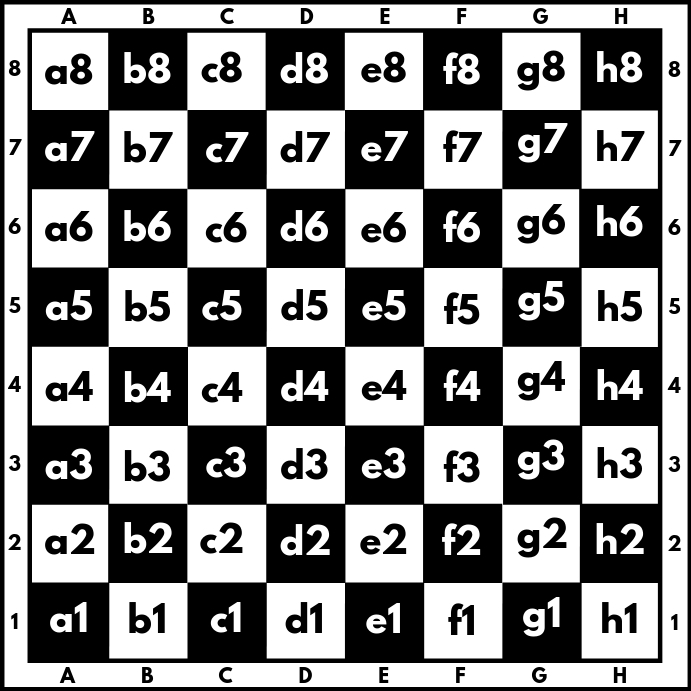

The positions of the pieces in the data set are shown in what is called "chess notation", which uses numbers for the rows, and letters for the files/columns. It is probably best to turn the letters data into numeric values.  

In [78]:
chess['WKingF'] = chess.WKingF.map({'a':1, 'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8})

In [79]:
#needed for yes or no model
chess["YorN"] = chess.WorL.map({"draw":"8>","zero":"8>","one":"8>","two":"8>","three":"8>","four":"8>","five":"8>","six":"8>","seven":"8>","eight":"8+","nine":"8+","ten":"8+","eleven":"8+","twelve":"8+","thirteen":"8+","fourteen":"8+","fifteen":"8+","sixteen":"8+"})

In [80]:
chess['BKingF'] = chess.BKingF.map({'a':1, 'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8})

In [81]:
 chess['WorL'] = chess.WorL.map({"draw":"it is a draw","zero":"less than eight","one":"less than eight", "two":"less than eight","three":"less than eight","four":"less than eight","five":"less than eight","six":"less than eight","seven":"less than eight","eight":"eight or more","nine":"eight or more","ten":"eight or more","eleven":"eight or more","twelve":"eight or more","thirteen":"eight or more","fourteen":"eight or more","fifteen":"eight or more","sixteen":"eight or more"})

In [82]:
chess.isna().any()

WKingF     False
WKingR     False
WhiteRF    False
WhiteRR    False
BKingF     False
BKingR     False
WorL       False
YorN       False
dtype: bool

In [83]:
chess.dropna()

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL,YorN
0,1,1,b,3,3,2,it is a draw,8>
1,1,1,c,1,3,2,it is a draw,8>
2,1,1,c,1,4,1,it is a draw,8>
3,1,1,c,1,4,2,it is a draw,8>
4,1,1,c,2,3,1,it is a draw,8>
...,...,...,...,...,...,...,...,...
28051,2,1,g,7,5,5,eight or more,8+
28052,2,1,g,7,5,6,eight or more,8+
28053,2,1,g,7,5,7,eight or more,8+
28054,2,1,g,7,6,5,eight or more,8+


In [84]:
chess.isna().any()

WKingF     False
WKingR     False
WhiteRF    False
WhiteRR    False
BKingF     False
BKingR     False
WorL       False
YorN       False
dtype: bool

In [85]:
chess['WhiteRF'] = chess.WhiteRF.map({'a':1, 'b':2,'c':3,'d':4,'e':5,'f':6,'g':7,'h':8})
chess.head(5)

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL,YorN
0,1,1,2,3,3,2,it is a draw,8>
1,1,1,3,1,3,2,it is a draw,8>
2,1,1,3,1,4,1,it is a draw,8>
3,1,1,3,1,4,2,it is a draw,8>
4,1,1,3,2,3,1,it is a draw,8>


Now that the data has been adjusted into numeric form, more in depth data analysis can be completed. 

In [86]:
chess.astype('object').describe().transpose()

,count,unique,top,freq
WKingF,28056,4,4,12136
WKingR,28056,4,1,12666
WhiteRF,28056,8,8,3616
WhiteRR,28056,8,5,3549
BKingF,28056,8,8,4848
BKingR,28056,8,5,3822
WorL,28056,3,eight or more,22884
YorN,28056,2,8+,22884


In [87]:
chess['YorN'].describe()

count     28056
unique        2
top          8+
freq      22884
Name: YorN, dtype: object

In [88]:
chessS = chess

In [89]:
chessK = chess

In [90]:
chessV = chess

In [91]:
chessF = chess 

In [92]:
print(22884/28029)

0.8164401155945628


In my data analysis, I spent time adjusting variables of the data to create a better model. First, I changed the file letters to numbers (a, b, c to 1, 2, 3) to help the model. After that, I changed what were seventeen different classifcation answers into three seperate ones: draw, a win for white in under eight moves, and a win for white in over eight moves. This will help simplify the model and perhaps increase the accuracy. It is hard to project the data from this data set onto graphs as the target variable is a string. One fear I have is that because 82% of the results are "eight or more". I fear the distrabution of data will somehow affect my model negatively.

In [93]:
chess = chess.dropna()

#Yes/No Logistic Regression

In this section, a logistic regression model will determine if it will take eight or more moves to win the game or not. To do this, a new variable will be added that will have a 8> (less than eight) or 8+ (eight or more) which was done in the data exploration section. 

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 12]

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [95]:
chess8 = chess


chess8.drop(columns = ['WorL'], inplace=True)

chess8.head()

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,YorN
0,1,1,2,3,3,2,8>
1,1,1,3,1,3,2,8>
2,1,1,3,1,4,1,8>
3,1,1,3,1,4,2,8>
4,1,1,3,2,3,1,8>


In [96]:
chess8['YorN'] = chess8['YorN'].astype("category")

In [97]:
chess8['YorN'].describe()

count     28056
unique        2
top          8+
freq      22884
Name: YorN, dtype: object

In [98]:
chess8x = chess8.drop(["YorN"], axis = 1)
chess8y = chess8["YorN"]

In [99]:
chess8.dropna(how='any')

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,YorN
0,1,1,2,3,3,2,8>
1,1,1,3,1,3,2,8>
2,1,1,3,1,4,1,8>
3,1,1,3,1,4,2,8>
4,1,1,3,2,3,1,8>
...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,8+
28052,2,1,7,7,5,6,8+
28053,2,1,7,7,5,7,8+
28054,2,1,7,7,6,5,8+


In [100]:
X_train,X_test,y_train,y_test=train_test_split(chess8x,chess8y,test_size=0.20,random_state=10,stratify=chess8y)

In [101]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [102]:
chess8.isna().any()

WKingF     False
WKingR     False
WhiteRF    False
WhiteRR    False
BKingF     False
BKingR     False
YorN       False
dtype: bool

In [103]:
y_pred = logreg.predict(X_test)
y_pred

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4544,   33],
       [ 922,  113]])

Text(0.5, 764.32, 'Predicted label')

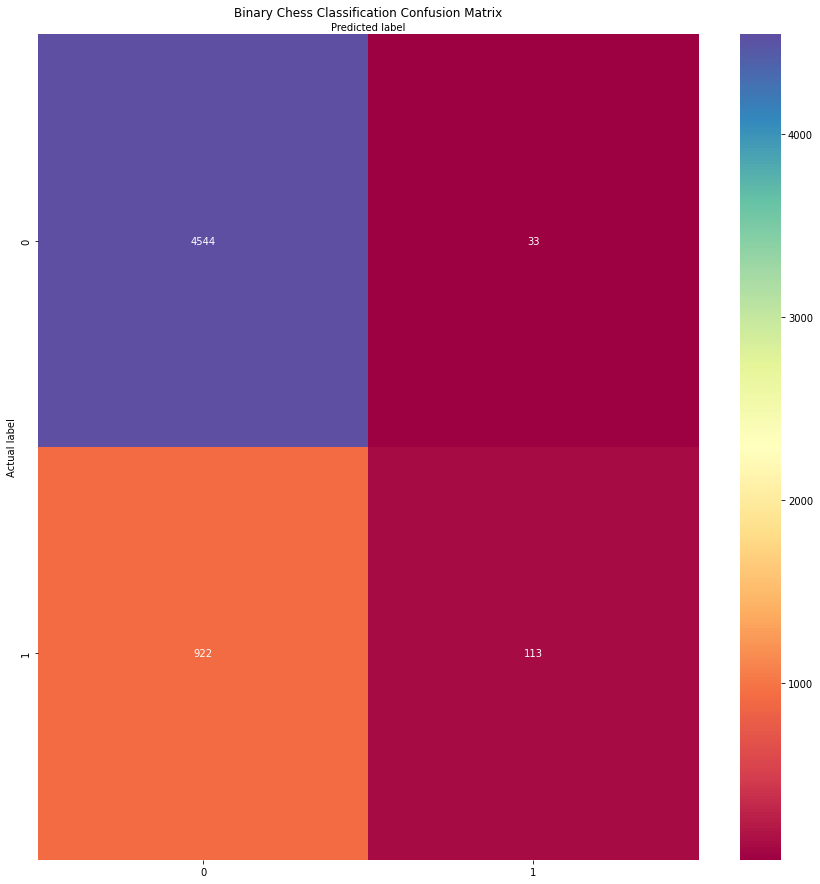

In [104]:
class_names=["Eight or more","Under Eight"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Spectral" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Binary Chess Classification Confusion Matrix', y=8.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [105]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8298289379900213


Overall, the model did slightly better than just assuming all the data is an eight or more move game. With an accuracy of 83%, the model did a fairly bad job of predicting the correct answer. Looking at the confusion matrix, the model did well predicting games of 8+ moves but very badly with games under 8 moves. Hopefully other models will produce better results. 

#SoftMax Logistic Regression

In [106]:

#chessS.drop(columns = ['YorN'], inplace=True)

chessS.head()

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL,YorN
0,1,1,2,3,3,2,it is a draw,8>
1,1,1,3,1,3,2,it is a draw,8>
2,1,1,3,1,4,1,it is a draw,8>
3,1,1,3,1,4,2,it is a draw,8>
4,1,1,3,2,3,1,it is a draw,8>


In [107]:
chessS.dropna(how='any')

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL,YorN
0,1,1,2,3,3,2,it is a draw,8>
1,1,1,3,1,3,2,it is a draw,8>
2,1,1,3,1,4,1,it is a draw,8>
3,1,1,3,1,4,2,it is a draw,8>
4,1,1,3,2,3,1,it is a draw,8>
...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,eight or more,8+
28052,2,1,7,7,5,6,eight or more,8+
28053,2,1,7,7,5,7,eight or more,8+
28054,2,1,7,7,6,5,eight or more,8+


In [108]:
chessS = chessS.drop(["YorN"], axis = 1)
chessSx = chessS.drop(["WorL"], axis = 1)
chessSy = chessS["WorL"]
chessSy.head()

0    it is a draw
1    it is a draw
2    it is a draw
3    it is a draw
4    it is a draw
Name: WorL, dtype: object

In [109]:
chessSy.dropna(how='any')

0         it is a draw
1         it is a draw
2         it is a draw
3         it is a draw
4         it is a draw
             ...      
28051    eight or more
28052    eight or more
28053    eight or more
28054    eight or more
28055    eight or more
Name: WorL, Length: 28056, dtype: object

In [110]:
chessS.isna().any()

WKingF     False
WKingR     False
WhiteRF    False
WhiteRR    False
BKingF     False
BKingR     False
WorL       False
dtype: bool

In [111]:
#np.isfinite(chessSy)

In [112]:
chessSy.describe()

count             28056
unique                3
top       eight or more
freq              22884
Name: WorL, dtype: object

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_chessSx = scaler.fit_transform(chessSx)

In [114]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(scale_chessSx, chessSy, test_size=0.20, random_state=10,stratify=chessSy)
#,stratify=chessSy

In [115]:
chessSmodel = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)


In [116]:
chessSmodel.fit(X_trainS, y_trainS)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [117]:
y_predS = chessSmodel.predict(X_testS)
chessSmodel.score(X_testS, y_testS)

0.8303635067712045

In [118]:
chessSmodel.score(X_trainS, y_trainS)

0.8315362680449118

In [119]:
cnf_matrix = metrics.confusion_matrix(y_testS, y_predS)
cnf_matrix

array([[4523,    0,   55],
       [ 548,    0,   11],
       [ 338,    0,  137]])

Text(0.5, 510.88, 'Predicted label')

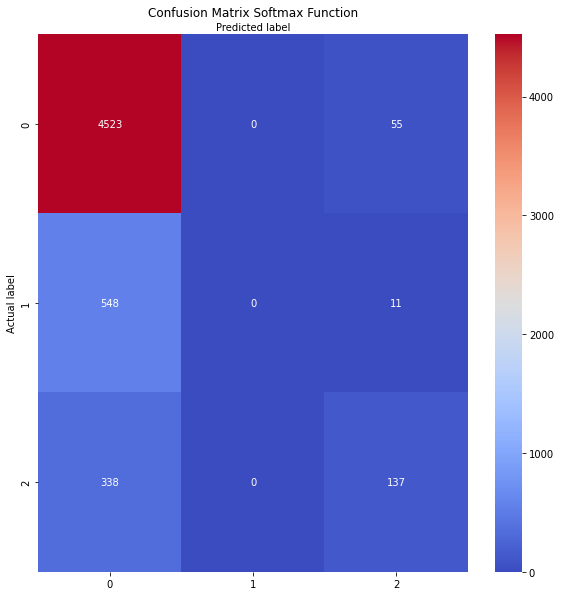

In [120]:
class_names=[0,1, 2] # name  of classes
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Softmax Function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In this model, a softmax function was created to determine the outcome of chess games: win in eight or more moves, win in less than eight moves, or a draw. The model did alright with the win in eight or more moves, but awful with the other two classifications. The model got zero total predictions for the less than eight classifaction, predicting most of those games to be eight or more. The model also got about three-fourthes of the draws wrong. Overall, this model did a very bad job. To correct this model in later versions, it would have been better to have a larger data set and a more even distribution of data among the different classes. 

#k-Nearest Neighbors 

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [122]:
chessK.drop(columns = ['YorN'], inplace=True)
chessK.head()

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL
0,1,1,2,3,3,2,it is a draw
1,1,1,3,1,3,2,it is a draw
2,1,1,3,1,4,1,it is a draw
3,1,1,3,1,4,2,it is a draw
4,1,1,3,2,3,1,it is a draw


In [123]:
chessKx=chessK.drop(["WorL"], axis = 1)
chessKy=chessK['WorL']

In [124]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(chessKx, chessKy, test_size=0.2, random_state=42, stratify=chessKy)

In [125]:
scalerK = StandardScaler()
scalerK.fit(X_trainK)
X_trainK = scalerK.transform(X_trainK)
X_testK = scalerK.transform(X_testK)

In [126]:
knn = KNeighborsClassifier()
knn.fit(X_trainK, y_trainK)

KNeighborsClassifier()

In [127]:
knn.score(X_testK, y_testK)

0.9504632929436921

In [128]:
y_predK = knn.predict(X_test)
y_predK

cnf_matrix = metrics.confusion_matrix(y_testK, y_predK)
cnf_matrix

array([[2282, 2269,   27],
       [ 271,  283,    5],
       [ 243,  229,    3]])

In [129]:
print("Accuracy:",metrics.accuracy_score(y_testK, y_predK))

Accuracy: 0.45759087669280113


Text(0.5, 764.32, 'Predicted label')

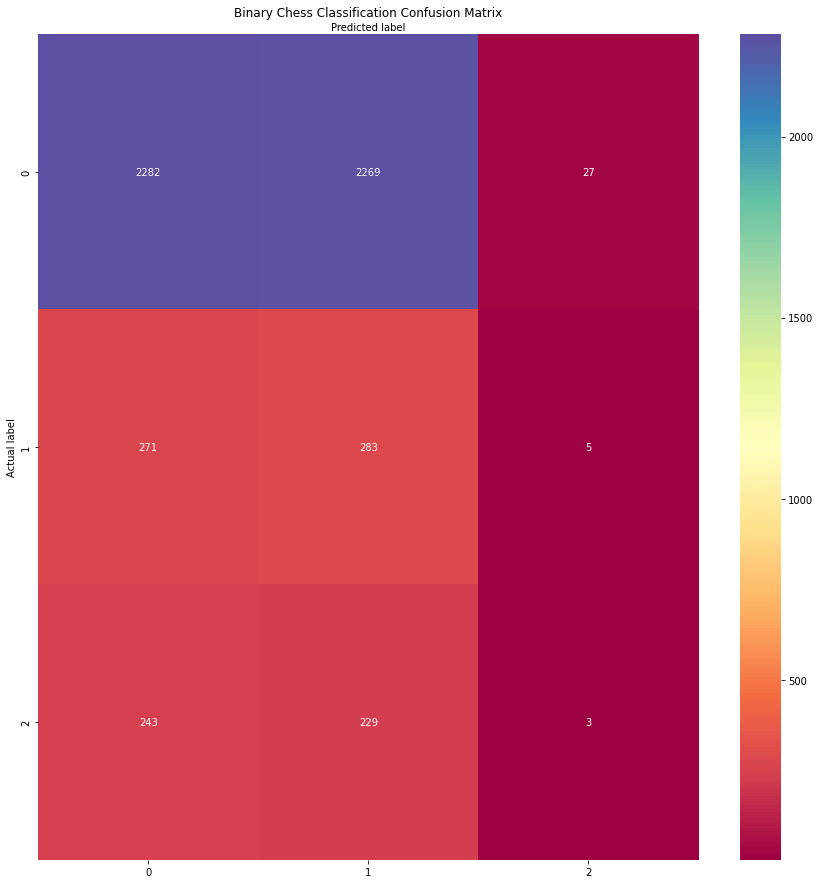

In [130]:
class_names=["0","1","2"]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Spectral" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Binary Chess Classification Confusion Matrix', y=8.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [131]:
print("Accuracy:",metrics.accuracy_score(y_testK, y_predK))

Accuracy: 0.45759087669280113


This K-nearest neighbors model performed very badly. I thought this model would perform the best out of all the models due to it being based on the positions of pieces and similar to how chess positions are on chess boards. With a 46% accuracy, this model did signifantly worse than the other two models. With the other two models, they did a good job of predicting the 8 or more move category but K-Nearest Neighbors got about half of those wrong, assigning them to the less than eight move category. 

#Support Vector Machine

In [132]:
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [133]:
chessV.head()

,WKingF,WKingR,WhiteRF,WhiteRR,BKingF,BKingR,WorL
0,1,1,2,3,3,2,it is a draw
1,1,1,3,1,3,2,it is a draw
2,1,1,3,1,4,1,it is a draw
3,1,1,3,1,4,2,it is a draw
4,1,1,3,2,3,1,it is a draw


In [134]:
chessVx=chessS.drop(["WorL"], axis = 1)
chessVy=chessS['WorL']

In [135]:
X_trainV, X_testV, y_trainV, y_testV = train_test_split(chessVx, chessVy, test_size=0.2, random_state=10, stratify=chessVy)

In [136]:
scaler = StandardScaler()
scaler.fit(X_trainV)
X_train = scaler.transform(X_trainV)
X_test = scaler.transform(X_testV)

In [137]:
chessRBF = SVC(kernel='rbf', C=1) 
chessRBF.fit(X_trainV,y_trainV)

SVC(C=1)

In [138]:
y_predV = chessRBF.predict(X_testV)
print(metrics.classification_report(y_testV, y_pred))

                 precision    recall  f1-score   support

             8+       0.00      0.00      0.00       0.0
             8>       0.00      0.00      0.00       0.0
  eight or more       0.00      0.00      0.00    4578.0
   it is a draw       0.00      0.00      0.00     559.0
less than eight       0.00      0.00      0.00     475.0

       accuracy                           0.00    5612.0
      macro avg       0.00      0.00      0.00    5612.0
   weighted avg       0.00      0.00      0.00    5612.0



In [139]:
cnf_matrixV = metrics.confusion_matrix(y_testV, y_predV)
cnf_matrixV

array([[4510,   25,   43],
       [   4,  552,    3],
       [ 141,    6,  328]])

Text(0.5, 510.88, 'Predicted label')

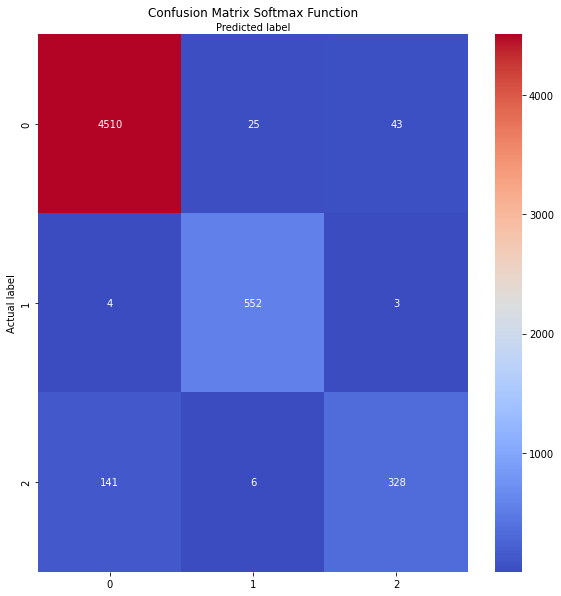

In [140]:
class_names=[0,1, 2] # name  of classes
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrixV), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Softmax Function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Wow, wow, wow, this model performed amazing. With an accuracy of over 93%, this model blew the previous models out of the water with it's fantastic accuracy at predicting the outcome of the game. After trying a couple of different values and kernels, the radial bases function fitted the best. 

#Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [142]:
chessFx=chessF.drop(["WorL"], axis = 1)
chessFy=chessF['WorL']

In [143]:
X_trainF, X_testF, y_trainF, y_testF = train_test_split(chessFx, chessFy, test_size=0.2, random_state=10, stratify=chessFy)

In [144]:
scaler = StandardScaler()
scaler.fit(X_trainF)
X_trainF = scaler.transform(X_trainF)
X_testF = scaler.transform(X_testF)

In [145]:
forest = RandomForestClassifier(random_state=10)
forest.fit(X_trainF, y_trainF)
y_predF = forest.predict(X_testF)

In [146]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_trainF, y_trainF)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_testF, y_testF)))

Accuracy on training set: 1.000
Accuracy on test set: 0.979


In [147]:
cnf_matrix = metrics.confusion_matrix(y_testF, y_predF)
cnf_matrix

array([[4545,   13,   20],
       [  37,  517,    5],
       [  33,   10,  432]])

Text(0.5, 510.88, 'Predicted label')

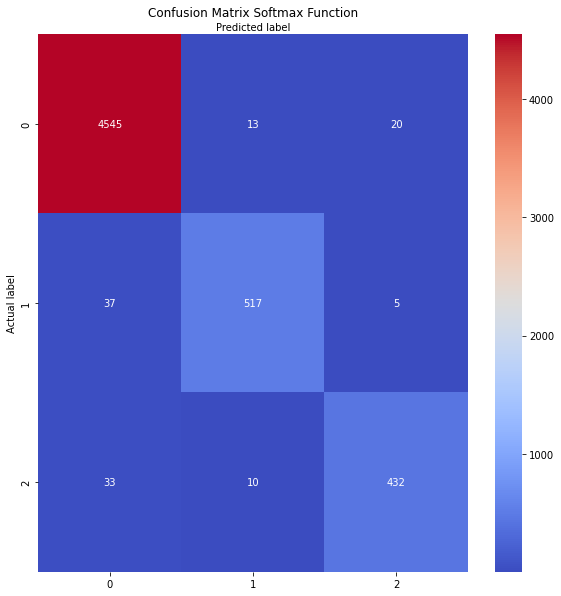

In [148]:
class_names=[0,1, 2] # name  of classes
fig, ax = plt.subplots(figsize=(8, 8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Softmax Function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

My random forest model performed extremely well, getting an accuracy of 98% which is definitly better than the accuracy I would have gotten when guessing the number of wins. This model out performed my previous models and is a better type of model because there is no black box for the most part. 

#Conclusion 

In conclusion, the three inital models produced do not do good jobs at predicting the outcomes of chess endgames. But the random forest and Support Vector Machine did great with accuracies of over 95%. In future models, it would be better to create more even classifications of the data instead of having one class make up over 80% of the data.  